#**Telehealth Operations Optimization**



This project focuses on optimizing operational processes in telehealth services using data science techniques. It includes data cleaning, automation of monthly reports, dashboard development using Tableau and Streamlit, and forecasting appointment trends for better planning.

##DataCleaning

In [69]:
import pandas as pd

# Load your dataset
df = pd.read_csv('telehealth_operations_dataset.csv')

In [70]:
# Preview first 5 rows
df.head()

,Patient_ID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No_show,Follow_Up_Sent,Reminder_Method,Follow_Up_Completed
0,1,M,2022-01-01 00:00:00,2022-01-02 00:00:00,76,Neighborhood_C,0,0,1,0,0,Yes,Yes,SMS,Yes
1,2,F,2022-01-01 00:01:00,2022-01-02 00:01:00,23,Neighborhood_C,1,1,0,0,0,Yes,Yes,SMS,Yes
2,3,M,2022-01-01 00:02:00,2022-01-02 00:02:00,70,Neighborhood_C,1,1,1,1,0,Yes,Yes,Email,No
3,4,M,2022-01-01 00:03:00,2022-01-02 00:03:00,18,Neighborhood_A,0,0,0,1,0,No,No,NaN,NaN
4,5,M,2022-01-01 00:04:00,2022-01-02 00:04:00,90,Neighborhood_A,1,0,0,0,1,No,No,NaN,NaN


In [71]:
# Shape of the dataset
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset has 110000 rows and 15 columns.


In [72]:
# Data types of each column
print(df.dtypes)

Patient_ID              int64
Gender                 object
ScheduledDay           object
AppointmentDay         object
Age                     int64
Neighbourhood          object
Scholarship             int64
Hipertension            int64
Diabetes                int64
Alcoholism              int64
SMS_received            int64
No_show                object
Follow_Up_Sent         object
Reminder_Method        object
Follow_Up_Completed    object
dtype: object


In [73]:
# Check for missing values
print(df.isnull().sum())

Patient_ID                 0
Gender                     0
ScheduledDay               0
AppointmentDay             0
Age                        0
Neighbourhood              0
Scholarship                0
Hipertension               0
Diabetes                   0
Alcoholism                 0
SMS_received               0
No_show                    0
Follow_Up_Sent             0
Reminder_Method        32963
Follow_Up_Completed    32963
dtype: int64


In [74]:
# Convert ScheduledDay and AppointmentDay to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
print(df.dtypes)

Patient_ID                      int64
Gender                         object
ScheduledDay           datetime64[ns]
AppointmentDay         datetime64[ns]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
SMS_received                    int64
No_show                        object
Follow_Up_Sent                 object
Reminder_Method                object
Follow_Up_Completed            object
dtype: object


Convert categorical variables to binary

In [75]:
# Convert No_show column: Yes -> 1, No -> 0
df['No_show'] = df['No_show'].map({'Yes': 1, 'No': 0})

# Convert Follow_Up_Sent column: Yes -> 1, No ->0
df['Follow_Up_Sent'] = df['Follow_Up_Sent'].map({'Yes': 1, 'No': 0})

# Convert Follow_Up_Completed column: Yes -> 1, No -> 0
# ( Some NaNs are there, we will fill them first with 'No' because Follow-Up Sent = No means No Follow-Up Completed)
df['Follow_Up_Completed'] = df['Follow_Up_Completed'].fillna('No')  # Fill missing/NaNs with 'No'
df['Follow_Up_Completed'] = df['Follow_Up_Completed'].map({'Yes': 1, 'No': 0})

# Convert Gender column: M -> 1, F -> 0
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})

# Check results
print(df[['No_show','Follow_Up_Sent', 'Follow_Up_Completed', 'Gender']].head())


   No_show  Follow_Up_Sent  Follow_Up_Completed  Gender
0        1               1                    1       1
1        1               1                    1       0
2        1               1                    0       1
3        0               0                    0       1
4        0               0                    0       1


Let us split Reminder_Method into 3 separate columns

In [76]:
# First, fill missing Reminder_Method with 'None' to make it easier
df['Reminder_Method'] = df['Reminder_Method'].fillna('None')

# Now create 3 new columns
df['Reminder_SMS'] = (df['Reminder_Method'] == 'SMS').astype(int)
df['Reminder_Email'] = (df['Reminder_Method'] == 'Email').astype(int)
df['Reminder_None'] = (df['Reminder_Method'] == 'None').astype(int)

# Quick check
print(df[['Reminder_SMS', 'Reminder_Email', 'Reminder_None']].head())


   Reminder_SMS  Reminder_Email  Reminder_None
0             1               0              0
1             1               0              0
2             0               1              0
3             0               0              1
4             0               0              1


In [77]:
# Check missing values after cleaning
print(df.isnull().sum())

# Check data types
print(df.dtypes)


Patient_ID             0
Gender                 0
ScheduledDay           0
AppointmentDay         0
Age                    0
Neighbourhood          0
Scholarship            0
Hipertension           0
Diabetes               0
Alcoholism             0
SMS_received           0
No_show                0
Follow_Up_Sent         0
Reminder_Method        0
Follow_Up_Completed    0
Reminder_SMS           0
Reminder_Email         0
Reminder_None          0
dtype: int64
Patient_ID                      int64
Gender                          int64
ScheduledDay           datetime64[ns]
AppointmentDay         datetime64[ns]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
SMS_received                    int64
No_show                         int64
Follow_Up_Sent                  int64
Reminder_Method                object
Follo

Performed cleaning of patient appointment data, including gender mapping, follow-up reminders, and no-show statuses.

##EDA (Exploratory Data Analysis)

In [78]:
#Check Overall Distributions

# Gender Distribution
print(df['Gender'].value_counts())

# No-show Distribution
print(df['No_show'].value_counts())

# Follow-Up Sent Distribution
print(df['Follow_Up_Sent'].value_counts())

# Reminder Type Distribution
print(df[['Reminder_SMS', 'Reminder_Email', 'Reminder_None']].sum())


Gender
0    55151
1    54849
Name: count, dtype: int64
No_show
0    55088
1    54912
Name: count, dtype: int64
Follow_Up_Sent
1    77037
0    32963
Name: count, dtype: int64
Reminder_SMS      38588
Reminder_Email    38449
Reminder_None     32963
dtype: int64


Gender Distribution Plot

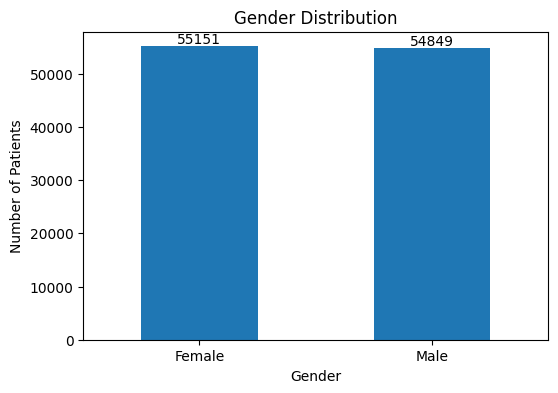

In [79]:
import matplotlib.pyplot as plt

# Gender Distribution
gender_counts = df['Gender'].value_counts()

# Plot
plt.figure(figsize=(6,4))
bars = gender_counts.plot(kind='bar')

# Set titles and labels
plt.title('Gender Distribution')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'], rotation=0)
plt.xlabel('Gender')
plt.ylabel('Number of Patients')

# Add value labels on top of each bar
for index, value in enumerate(gender_counts):
    plt.text(index, value + 500, str(value), ha='center', fontsize=10)

plt.show()


No-Show Rate Plot

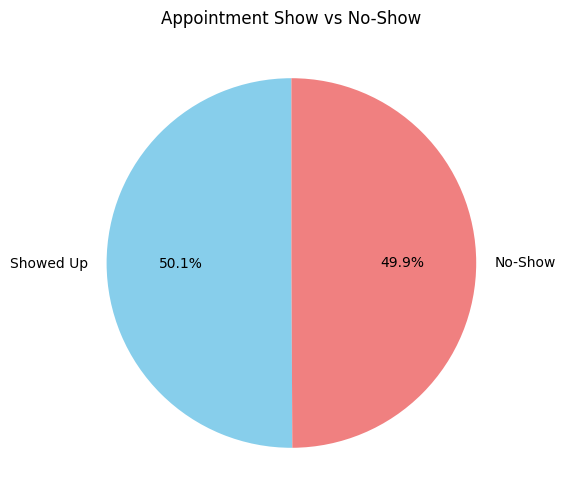

In [80]:
# No-show distribution
no_show_counts = df['No_show'].value_counts()

# Plot
plt.figure(figsize=(6,6))
plt.pie(no_show_counts, labels=['Showed Up', 'No-Show'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Appointment Show vs No-Show')
plt.show()

Reminder Method Plot

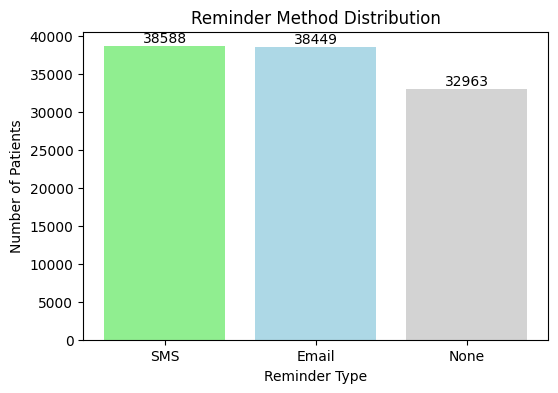

In [81]:
# Reminder Method Distribution
reminder_counts = {
    'SMS': df['Reminder_SMS'].sum(),
    'Email': df['Reminder_Email'].sum(),
    'None': df['Reminder_None'].sum()
}

# Plot
plt.figure(figsize=(6,4))
bars = plt.bar(reminder_counts.keys(), reminder_counts.values(), color=['lightgreen', 'lightblue', 'lightgrey'])
plt.title('Reminder Method Distribution')
plt.xlabel('Reminder Type')
plt.ylabel('Number of Patients')

# Add counts on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 500, str(int(height)), ha='center', fontsize=10)

plt.show()


Age Distribution

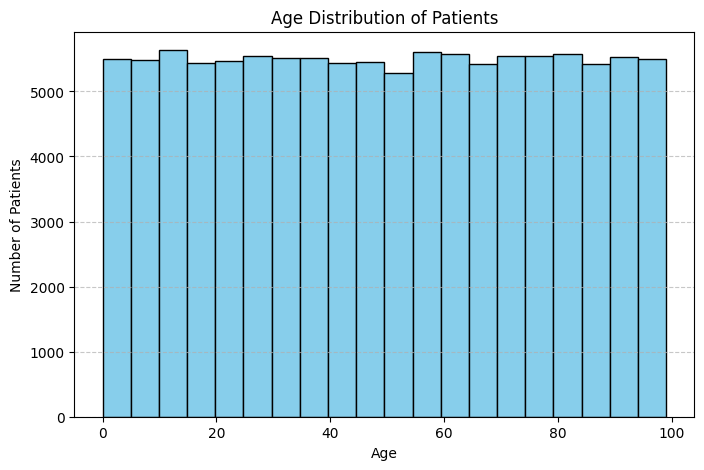

In [82]:
# Age Distribution
plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Waiting Time Distribution

First, we need to create a "Waiting Days" column
(Waiting Days = Appointment Day - Scheduled Day)



In [83]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Create Waiting_Days column
df['Waiting_Days'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

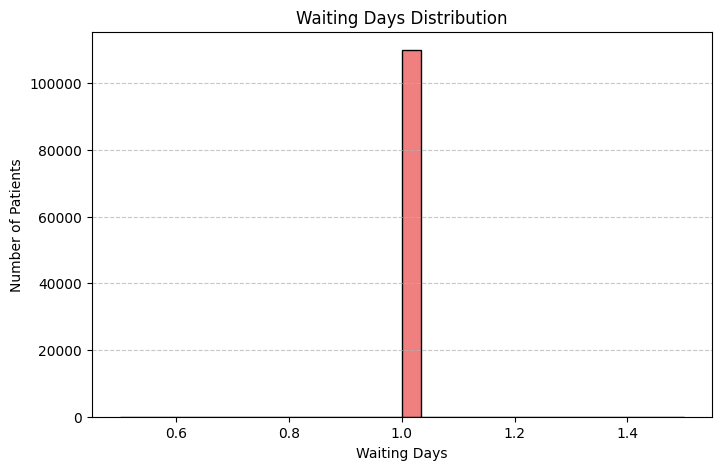

In [84]:
# Waiting Days Distribution
plt.figure(figsize=(8,5))
plt.hist(df['Waiting_Days'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Waiting Days Distribution')
plt.xlabel('Waiting Days')
plt.ylabel('Number of Patients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Waiting_Days = 1 for almost all patients,So plotting Waiting Days will show just one bar at 1 day. Therefore, We don’t waste time on this plot.

In [85]:
# Drop Waiting_Days column if not useful
df = df.drop('Waiting_Days', axis=1)

No-show Rate by Age Group

We’ll check which Age Group has the highest No-Show rate

In [86]:
# Create Age Groups
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

<ipython-input-87-47020841a408>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_show_by_age = df.groupby('Age_Group')['No_show'].mean()


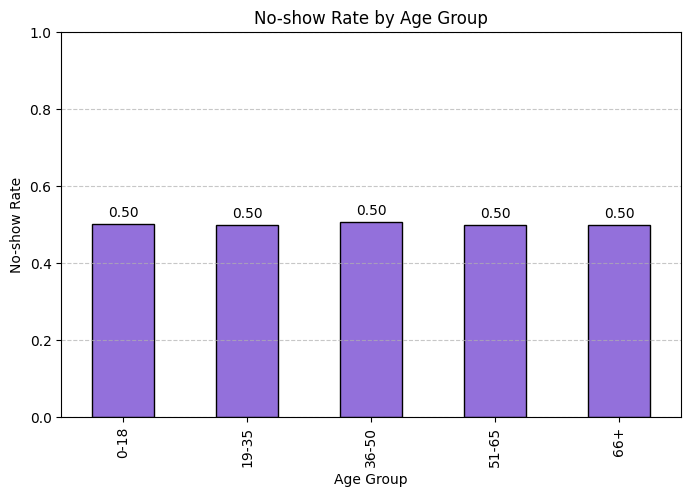

In [87]:
# Calculate No-show rate per Age Group
no_show_by_age = df.groupby('Age_Group')['No_show'].mean()

# Plot
plt.figure(figsize=(8,5))
bars = no_show_by_age.plot(kind='bar', color='mediumpurple', edgecolor='black')
plt.title('No-show Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('No-show Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for index, value in enumerate(no_show_by_age):
    plt.text(index, value + 0.02, f"{value:.2f}", ha='center', fontsize=10)

plt.show()

No major difference between younger and older patients

In [88]:
# Drop Age_Group column if not useful
df = df.drop('Age_Group', axis=1)

Follow-Up Completion Rate by Reminder Type Plot

In [89]:
# Check combination counts
print(df.groupby(['Follow_Up_Sent', 'Reminder_Method']).size())

Follow_Up_Sent  Reminder_Method
0               None               32963
1               Email              38449
                SMS                38588
dtype: int64


In [90]:
# Only patients where follow-up was sent
followup_data = df[df['Follow_Up_Sent'] == 1]

# Group by Reminder_Method and calculate Follow-Up Completion Rate
followup_completion_rate = followup_data.groupby('Reminder_Method')['Follow_Up_Completed'].mean()

# Show results
print(followup_completion_rate)


Reminder_Method
Email    0.601290
SMS      0.599461
Name: Follow_Up_Completed, dtype: float64


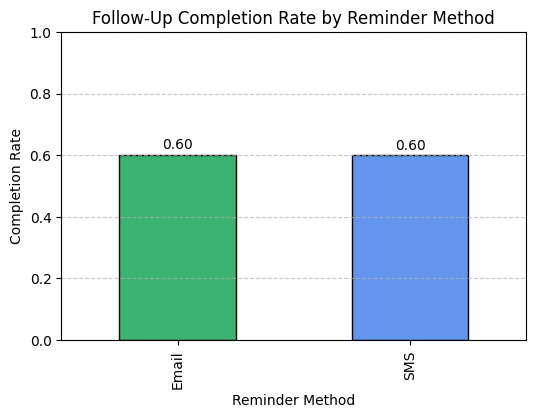

In [91]:
# Plot
plt.figure(figsize=(6,4))
bars = followup_completion_rate.plot(kind='bar', color=['mediumseagreen', 'cornflowerblue'], edgecolor='black')
plt.title('Follow-Up Completion Rate by Reminder Method')
plt.xlabel('Reminder Method')
plt.ylabel('Completion Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels
for index, value in enumerate(followup_completion_rate):
    plt.text(index, value + 0.02, f"{value:.2f}", ha='center', fontsize=10)

plt.show()

Follow-Up Completion Rate for SMS and Email reminders were approximately equal (~60%), so no significant difference was observed

##KPI Metrics

1)Appointment No-Show Rate

In [92]:
# Calculate Appointment No-Show Rate
no_show_rate = df['No_show'].mean()

# Print result
print(f"Appointment No-Show Rate: {no_show_rate:.2%}")

Appointment No-Show Rate: 49.92%


2)Appointment Completion Rate

In [93]:
# Calculate Appointment Completion Rate
completion_rate = 1 - no_show_rate

# Print result
print(f"Appointment Completion Rate: {completion_rate:.2%}")

Appointment Completion Rate: 50.08%


3)Follow-Up Sent Rate

This gives what % of all patients were sent a follow-up survey/reminder after their appointment.

In [94]:
# Calculate Follow-Up Sent Rate
follow_up_sent_rate = (df['Follow_Up_Sent'] == 1).mean()

# Print result
print(f"Follow-Up Sent Rate: {follow_up_sent_rate:.2%}")

Follow-Up Sent Rate: 70.03%


4)Follow-Up Completion Rate

This gives whether patients actually complete the follow-up

In [95]:
# Only consider rows where Follow-Up was sent
followup_data = df[df['Follow_Up_Sent'] == 1]

# Calculate Follow-Up Completion Rate
follow_up_completion_rate = followup_data['Follow_Up_Completed'].mean()

# Print result
print(f"Follow-Up Completion Rate: {follow_up_completion_rate:.2%}")

Follow-Up Completion Rate: 60.04%


5)Appointments per Neighborhood


In [96]:
# Appointments per Neighborhood
appointments_per_neighborhood = df['Neighbourhood'].value_counts()
print(appointments_per_neighborhood.head())

Neighbourhood
Neighborhood_B    36791
Neighborhood_A    36619
Neighborhood_C    36590
Name: count, dtype: int64


6)Follow-Up Survey Burden

This measures how many follow-ups are still pending — sent but not completed.

In [97]:
# Only consider rows where Follow-Up was sent
followup_data = df[df['Follow_Up_Sent'] == 1]

# Calculate Follow-Up Burden (pending follow-ups)
follow_up_burden = (followup_data['Follow_Up_Completed'] == 0).mean()

# Print result
print(f"Follow-Up Survey Burden: {follow_up_burden:.2%}")

Follow-Up Survey Burden: 39.96%


7)Appointments Over Time (Monthly)

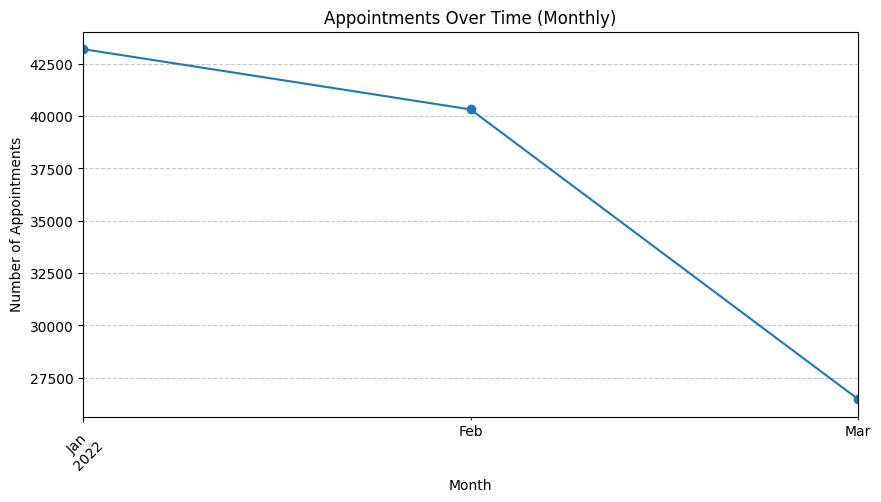

In [98]:
# First, create a new column for Appointment Month
df['Appointment_Month'] = df['AppointmentDay'].dt.to_period('M')

# Group and count appointments by month
appointments_over_time = df['Appointment_Month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,5))
appointments_over_time.plot(kind='line', marker='o')
plt.title('Appointments Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

8) No-Show Trend Over Time

This will show how the No-Show % changed each month — not just total appointments

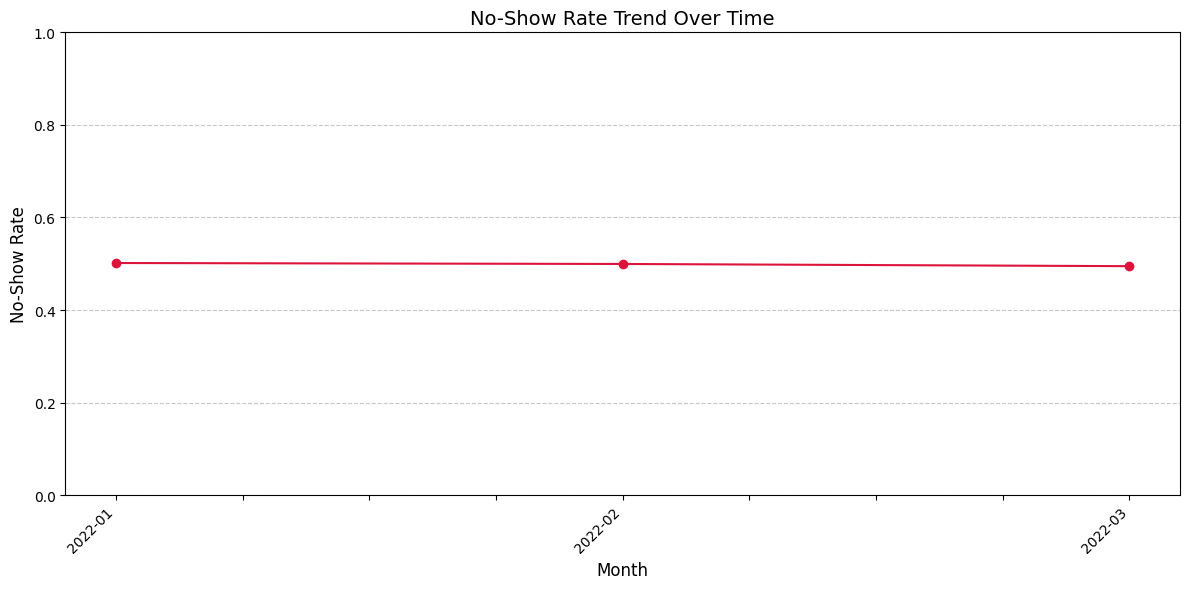

In [99]:
# Create a new Month column
df['Appointment_Month'] = df['AppointmentDay'].dt.to_period('M')

# Group by month and calculate No-Show Rate per month
no_show_trend = df.groupby('Appointment_Month')['No_show'].mean()

# Convert PeriodIndex to string for better labeling
no_show_trend.index = no_show_trend.index.astype(str)

# Plot
plt.figure(figsize=(12,6))
no_show_trend.plot(kind='line', marker='o', color='crimson')
plt.title('No-Show Rate Trend Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('No-Show Rate', fontsize=12)
plt.ylim(0, 1)  # Since No-Show Rate is 0-1
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The no-show rate remained consistently around 50% across the first quarter of 2022 (January to March). No significant upward or downward trend was observed.

##Code to save for Tableau

In [100]:
# Save full cleaned appointment data
df.to_csv('appointment_data.csv', index=False)

# Prepare monthly aggregate for trend graphs
monthly_data = df.groupby('Appointment_Month').agg({
    'No_show': 'mean',
    'Patient_ID': 'count'
}).reset_index()

monthly_data.columns = ['Appointment_Month', 'No_Show_Rate', 'Total_Appointments']

# Save monthly data
monthly_data.to_csv('monthly_aggregates.csv', index=False)

##AUTOMATE THE CODE

In [105]:
import pandas as pd

df = pd.read_csv('telehealth_operations_dataset.csv')
print(df.columns.tolist())

['Patient_ID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'No_show', 'Follow_Up_Sent', 'Reminder_Method', 'Follow_Up_Completed']


In [106]:
!python telehealth_automation.py

✅ Cleaned appointment_data.csv saved.
✅ monthly_aggregates.csv saved.
🎯 Full automation from raw to Tableau-ready files completed!


Automated the entire data preparation process using Python.

##Build a Streamlit App

In [107]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 9.3 MB/s eta 0:00:00


In [110]:
!pip install pyngrok

In [114]:
from pyngrok import ngrok
ngrok.set_auth_token("2vuiDTrq0nK5DXu6zCcEfQTgGdO_6YdSnt9t8dLAkcSrpdGvQ")

In [123]:
!streamlit run telehealth_dashboard_app.py &>/dev/null&
public_url = ngrok.connect(addr="8501", proto="http")
public_url


<NgrokTunnel: "https://fb09-34-106-190-81.ngrok-free.app" -> "http://localhost:8501">

Developed an interactive dashboard to upload data and view KPIs dynamically

##Forecasting and Prediction

In [118]:
import pandas as pd

data = pd.read_csv('monthly_aggregates.csv')
print(data.columns.tolist())

['Appointment_Month', 'Total_Appointments', 'No_Show_Rate']


In [122]:
# Forecasting Telehealth Appointments and No-Show Rates

import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Step 1: Load your monthly aggregate dataset
data = pd.read_csv('monthly_aggregates.csv')

# Step 2: Prepare the data
# Convert month names to simple numbers (January=1, February=2, etc.)
data['Month_Num'] = pd.to_datetime(data['Appointment_Month']).dt.month

# Features (X) and Targets (Y)
X = data[['Month_Num']]
y_appointments = data['Total_Appointments']
y_noshow = data['No_Show_Rate']

# Step 3: Fit Linear Regression Models
model_appointments = LinearRegression()
model_noshow = LinearRegression()

model_appointments.fit(X, y_appointments)
model_noshow.fit(X, y_noshow)

# Step 4: Predict for April (4) and May (5)
future_months = pd.DataFrame({'Month_Num': [4, 5]})

future_appointments = model_appointments.predict(future_months)
future_noshow = model_noshow.predict(future_months)

# Step 5: Show Results
forecast = pd.DataFrame({
    'Month': ['April 2022', 'May 2022'],
    'Predicted Appointments': np.round(future_appointments).astype(int),
    'Predicted No-Show Rate (%)': np.round(future_noshow * 100, 2)
})

print(forecast)


        Month  Predicted Appointments  Predicted No-Show Rate (%)
0  April 2022                   17067                       49.13
1    May 2022                    7267                       48.77


Used Linear Regression to forecast future appointment volumes and no-show rates for April and May 2022.

## ✅ Conclusion

Through this project, telehealth operational performance can now be monitored and forecasted dynamically. This solution enables faster decision-making, reduces manual reporting, and allows stakeholders to predict future appointment challenges in advance.
